# Dataset Explanation
The dataset contains data for county subdivisions across all U.S. states and territories.
Important data includes:
- Geographic identifiers
- Subdivision names
- Area measurements
- State abbreviations
- Geometries used for plotting maps
  
For this lab we will be focusing on the 48 contiguous U.S. states

## Import and load dataset

In [29]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data set and show first 5 entries
gdf = gpd.read_file('data/cb_2020_us_cousub_500k.shp')
gdf.head()

STATEFP COUNTYFP COUSUBFP  COUSUBNS             AFFGEOID       GEOID  \
0      29      195    22096  00767361  0600000US2919522096  2919522096   
1      38      099    45260  01036531  0600000US3809945260  3809945260   
2      38      017    16100  01036391  0600000US3801716100  3801716100   
3      38      093    22940  01036472  0600000US3809322940  3809322940   
4      38      079    67780  01036243  0600000US3807967780  3807967780   

       NAME           NAMELSAD STUSPS       NAMELSADCO    STATE_NAME LSAD  \
0   Elmwood   Elmwood township     MO    Saline County      Missouri   44   
1    Latona    Latona township     ND     Walsh County  North Dakota   44   
2   Cornell   Cornell township     ND      Cass County  North Dakota   44   
3  Eldridge  Eldridge township     ND  Stutsman County  North Dakota   44   
4   Rolette       Rolette city     ND   Rolette County  North Dakota   25   

       ALAND   AWATER                                           geometry  
0  181233131   377337  POLYGON ((-93.49 39.067, -93.489 39.074, -93.4...  
1   90848624  2941846  POLYGON ((-98.163 48.37, -98.057 48.369, -98.0...  
2   93440087        0  POLYGON ((-97.705 47.05, -97.706 47.051, -97.7...  
3   90001176  2572532  POLYGON ((-98.946 46.979, -98.859 46.979, -98....  
4    2609731        0  POLYGON ((-99.853 48.668, -99.831 48.668, -99....

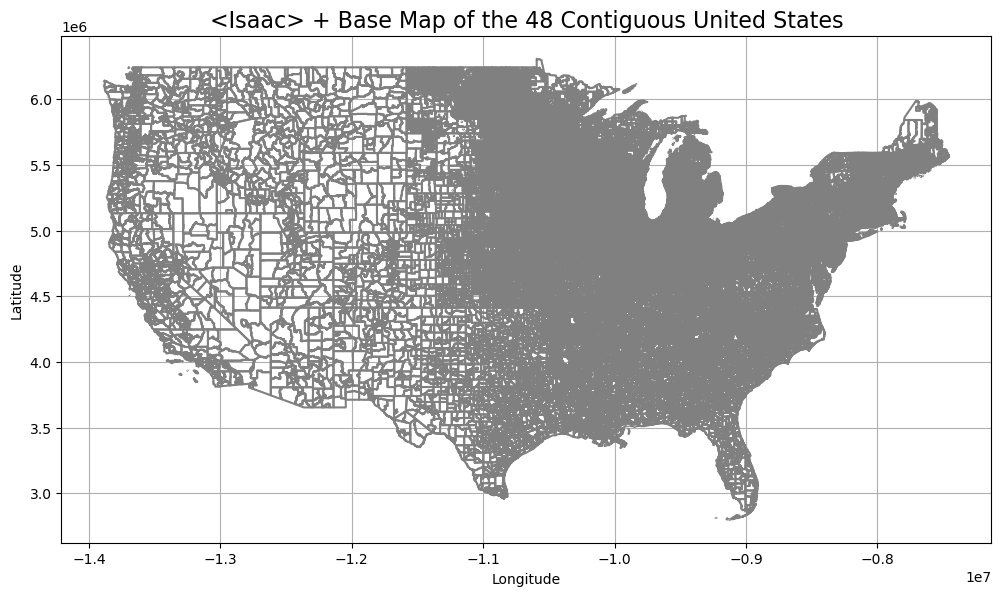

In [30]:
# Remove non-contiguous states and territories
exclude_states = ['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS']
gdf_contiguous = gdf[~gdf["STUSPS"].isin(exclude_states)]

# Convert to a common CRS and plot state boundaries
states = gdf_contiguous.to_crs("EPSG:3395")
states.boundary.plot(figsize=(12, 8), edgecolor='grey')
plt.title('<Isaac> + Base Map of the 48 Contiguous United States', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.savefig('Isaac_BaseMap.png', dpi=300)
plt.show()

## Visualization: Land Area by State

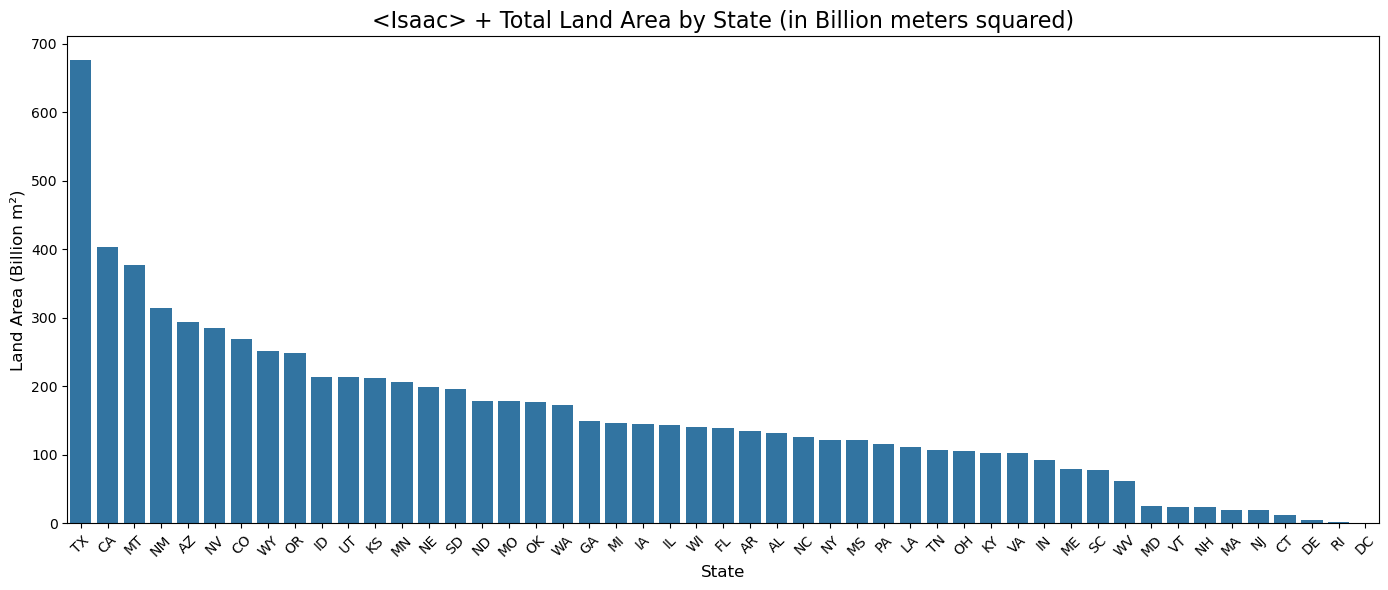

In [31]:
# Group by state and calculate total land area
state_area = gdf_contiguous.groupby('STUSPS')['ALAND'].sum().sort_values(ascending=False)

# Plot and save the bar chart
plt.figure(figsize=(14, 6))
# convert to billion sq meters
sns.barplot(x=state_area.index, y=state_area.values / 1e9)
plt.title('<Isaac> + Total Land Area by State (in Billion meters squared)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Land Area (Billion m²)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Isaac_LandAreaBarChart.png', dpi=300)
plt.show()


* This bar chart displays the total land area per state, aggregated from county subdivisions.
* It highlights the states with the largest physical landmass.
* This helps the viewer understand how geographic size varies significantly across the U.S., with states like Texas and California showing prominently. 

## Visualization: Water Area by State

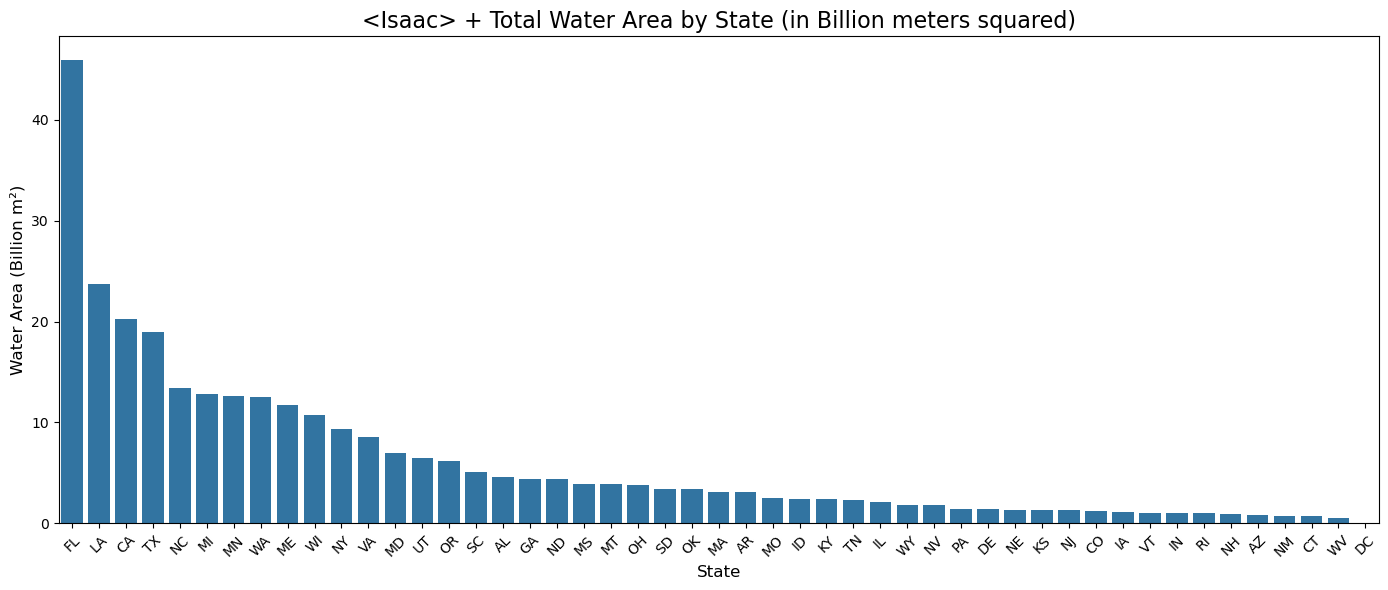

In [32]:
# Group by state and calculate total water area
state_water = gdf_contiguous.groupby('STUSPS')['AWATER'].sum().sort_values(ascending=False)

# Plot and save the bar chart
plt.figure(figsize=(14, 6))
# convert to billion sq meters
sns.barplot(x=state_water.index, y=state_water.values / 1e9)
plt.title('<Isaac> + Total Water Area by State (in Billion meters squared)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Water Area (Billion m²)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Isaac_WaterAreaBarChart.png', dpi=300)
plt.show()

* This chart shows how much water surface area exists within each state.
* States with large lakes or coastal access like Michigan or Florida stand out with mroe water coverage.
* This helps the viewer visualize the water area each states has. 

## Visualization: Top 10 States by Land Area

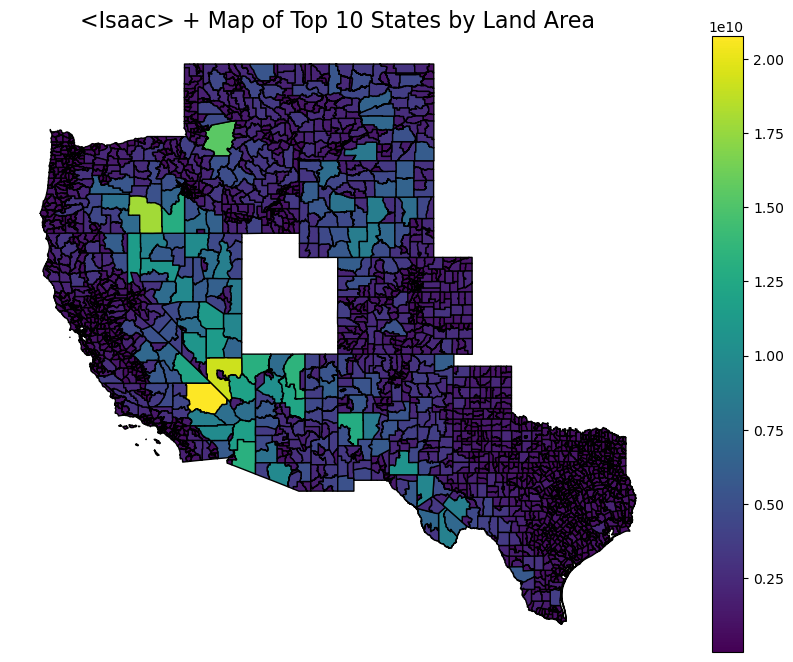

In [33]:
# Get top 10 largest land area states and filter the GeoDataFrame
top10_states = state_area.head(10).index.tolist()
top10_df = gdf_contiguous[gdf_contiguous['STUSPS'].isin(top10_states)]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
top10_df.plot(ax=ax, column='ALAND', legend=True, cmap='viridis', edgecolor='black')
plt.title('<Isaac> + Map of Top 10 States by Land Area', fontsize=16)
plt.axis('off')
plt.savefig('Isaac_Top10StatesMap.png', dpi=300)
plt.show()

* This map focuses on the ten states with the largest land areas.
* Each state is color coded based on its total land mass.
* This helps the viewer visualize the top ten states with land mass. 

## Visualization: Top 10 States by Water Area

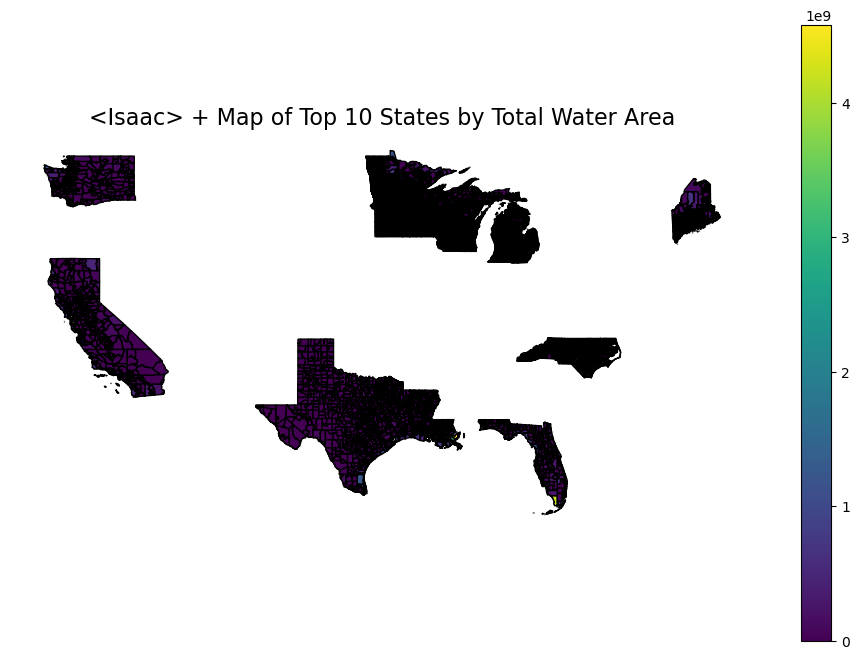

In [34]:
# Group by state and get total water area, then select top 10
top10_states_water = state_water.head(10).index.tolist()
top10_water_df = gdf_contiguous[gdf_contiguous['STUSPS'].isin(top10_states_water)]

# Plot map of the top 10 states by water area
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
top10_water_df.plot(ax=ax, column='AWATER', legend=True, cmap='viridis', edgecolor='black')
plt.title('<Isaac> + Map of Top 10 States by Total Water Area', fontsize=16)
plt.axis('off')
plt.savefig('Isaac_Top10WaterStatesMap.png', dpi=300)
plt.show()

* This map focuses on the ten states with the largest water surface areas.
* Each state is color coded based on its total water area values.
* This helps the viewer visualize the top ten states with the most water surface area. 

## Visualization: Stacked Bar Chart of Land and Water Area by State

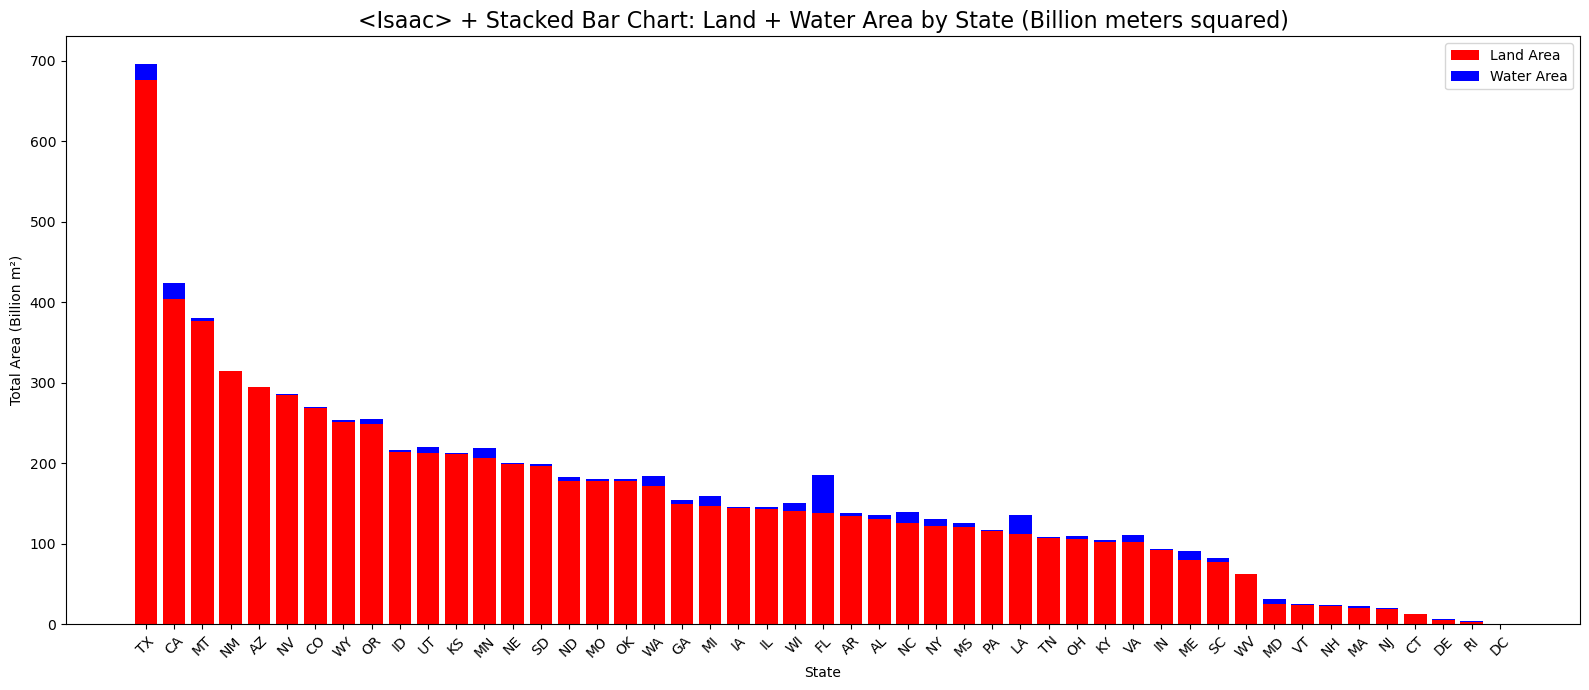

In [35]:
# Group and prep data
stack_df = gdf_contiguous.groupby('STUSPS')[['ALAND', 'AWATER']].sum() / 1e9
stack_df = stack_df.sort_values(by='ALAND', ascending=False)

# Plot the data
plt.figure(figsize=(16, 7))
plt.bar(stack_df.index, stack_df['ALAND'], label='Land Area', color='red')
plt.bar(stack_df.index, stack_df['AWATER'], bottom=stack_df['ALAND'], label='Water Area', color='blue')

plt.title('<Isaac> + Stacked Bar Chart: Land + Water Area by State (Billion meters squared)', fontsize=16)
plt.xlabel('State')
plt.ylabel('Total Area (Billion m²)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('Isaac_StackedAreaChart.png', dpi=300)
plt.show()

* This stacked bar chart shows the combined land and water areas for each state.
* Land area is shown in red, while water area is shown in blue.
* This visualization helps the viewer visualize how much of each state's area is made up of water, and which states have a total area greater than others. 